### Import Database

In [14]:
import pandas as pd

sheet = pd.read_csv('exportacoes_franca.csv')

sheet = sheet.loc[sheet['Economic Block']=='Europe',:]

# drop -> excluding collumns
# loc -> filter
# sort -> ordering collumns

display(sheet)

,Year,Month,Country,City,SH4 Code,SH4 Description,SH2 Code,SH2 Description,Economic Block,US$ FOB,Net Weight
0,2016,1,France,Águas Mornas - SC,303,"Fish, frozen, excluding fish fillets and other...",3,"Fish and crustaceans, molluscs and other aquat...",Europe,79360,14150
2,2016,1,France,Águas Mornas - SC,304,Fish fillets and other fish meat (whether or n...,3,"Fish and crustaceans, molluscs and other aquat...",Europe,69412,9385
4,2016,1,France,Alfenas - MG,901,"Coffee, whether or not roasted or decaffeinate...",9,"Coffee, tea, maté and spices",Europe,180914,57600
6,2016,1,France,Alta Floresta - MT,4409,Wood (including strips and friezes for parquet...,44,Wood and articles of wood; wood charcoal,Europe,47828,28306
8,2016,1,France,Ananindeua - PA,1211,Plants and parts of plants (including seeds an...,12,"Oil seeds and oleaginous fruits; Grains, Seeds...",Europe,391,22
...,...,...,...,...,...,...,...,...,...,...,...
142350,2020,12,France,Vinhedo - SP,4016,Other articles of vulcanised rubber other than...,40,Rubber and articles thereof,Europe,136,0
142352,2020,12,France,Vinhedo - SP,6806,"Slag wool, rock wool and similar mineral wools...",68,"Articles of stone, plaster, cement, asbestos, ...",Europe,76,50
142354,2020,12,France,Vinhedo - SP,8424,Mechanical appliances (whether or not hand-ope...,84,"Nuclear reactors, boilers, machinery and mecha...",Europe,2316,4
142356,2020,12,France,Vitória de Santo Antão - PE,714,"Manioc, arrowroot, salep, Jerusalem artichokes...",7,Edible vegetables and certain roots and tubers,Europe,27060,26400


### General Information

In [11]:
print(sheet.info())

# display(sheet.describe()) is a good alternative

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142360 entries, 0 to 142359
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Year             142360 non-null  int64 
 1   Month            142360 non-null  int64 
 2   Country          142360 non-null  object
 3   City             142360 non-null  object
 4   SH4 Code         142360 non-null  int64 
 5   SH4 Description  142360 non-null  object
 6   SH2 Code         142360 non-null  int64 
 7   SH2 Description  142360 non-null  object
 8   Economic Block   142360 non-null  object
 9   US$ FOB          142360 non-null  int64 
 10  Net Weight       142360 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 11.9+ MB
None


### How have exports to France (US dollars) evolved over the years?

,US$ FOB
Year,
2016,"US$2,307,750,041.00"
2017,"US$2,224,352,728.00"
2018,"US$2,619,712,208.00"
2019,"US$2,609,361,806.00"
2020,"US$1,983,797,405.00"


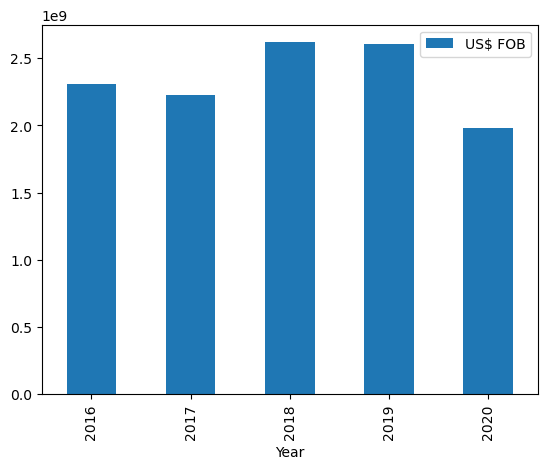

In [19]:
export_year = sheet.groupby("Year").sum()
# export_year = sheet.groupby(["Year","Month"]).sum() if you want to group by month
export_year = export_year[["US$ FOB"]]
# export_year = export_year[["US$ FOB","Net Weight"]] if you want more collumns

export_year.plot(kind='bar')

# Formatting function
def formatting(valor):
    return f"US${valor:,.2f}"

# Applying
export_year["US$ FOB"] = export_year['US$ FOB'].map(formatting)

display(export_year)

### What are the most exported products throughout the period?

In [22]:
export_product = sheet.groupby("SH4 Description").sum() # grouping by this collumn
export_product = export_product[['US$ FOB']] # redefining to show just the SH4 Description and US$ FOB collumns

export_product = export_product.sort_values('US$ FOB', ascending=False) # sorting 
export_product['US$ FOB'] = export_product['US$ FOB'].map(formatting) # formatting with our formatting function

display(export_product)

,US$ FOB
SH4 Description,
"Soybean oilcake and other solid residue, wh/not ground","US$2,814,212,320.00"
"Iron ores and concentrates, including roasted iron pyrites","US$1,632,140,244.00"
"Chemical wood pulp, soda or sulphate, other than dissolving grades","US$922,712,342.00"
"Coffee, whether or not roasted or decaffeinated; coffee husks and skins; coffee substitutes containing coffee in any proportion","US$536,277,376.00"
"Other aircraft (for example, helicopters, aeroplanes); spacecraft (including satellites) and suborbital and spacecraft launch vehicles","US$342,566,535.00"
...,...
Anti-freezing preparations and prepared de-icing fluids,US$5.00
"Man-made filament yarn (other than sewing thread), put up for retail sale",US$5.00
"Glass envelopes (including bulbs and tubes), open, and glass parts thereof, without fittings, for electric lamps, cathode-ray tubes or the like",US$4.00


### In 2020, which city exported the most to France?

In [28]:
# first we have to filter only the 2020 year

sheet_2020 = sheet.loc[sheet['Year']==2020,:]
# display(sheet_2020) if you want to check

export_cities_2020 = sheet_2020.groupby('City').sum()
export_cities_2020 = export_cities_2020[['US$ FOB']]

export_cities_2020 = export_cities_2020.sort_values('US$ FOB', ascending=False)
export_cities_2020['US$ FOB'] = export_cities_2020['US$ FOB'].map(formatting)
display(export_cities_2020)


,US$ FOB
City,
Duque de Caxias - RJ,"US$139,702,798.00"
Luís Eduardo Magalhães - BA,"US$132,664,066.00"
Ponta Grossa - PR,"US$93,888,508.00"
São José dos Campos - SP,"US$86,469,638.00"
Rio de Janeiro - RJ,"US$61,261,107.00"
...,...
Não-Me-Toque - RS,US$21.00
Cubatão - SP,US$20.00
Holambra - SP,US$5.00


### What did the 2 biggest cities export so much?

In [34]:
# Duque de caxias - RJ

sheet_city = sheet_2020.loc[sheet_2020['City']=='Duque de Caxias - RJ',:]
sheet_city = sheet_city.groupby('SH4 Description').sum()
sheet_city = sheet_city[['US$ FOB']]
sheet_city = sheet_city.sort_values('US$ FOB', ascending = False)

sheet_city['US$ FOB'] = sheet_city['US$ FOB'].map(formatting)

display(sheet_city)


,US$ FOB
SH4 Description,
"Turbo-jets, turbo-propellers and other gas turbines","US$82,490,516.00"
Crude oil from petroleum and bituminous minerals,"US$33,610,511.00"
"Transmission shafts (including cam shafts and crank shafts) and cranks; bearing housings and plain shaft bearings; gears and gearing; ball or roller screws; gear boxes and other speed changers, including torque converters; flywheels and pulleys, including","US$4,897,696.00"
Ball or roller bearings,"US$4,123,545.00"
"Screws, bolts, nuts, coach screws, screw hooks, rivets, cotters, cotter-pins, washers (including spring washers) and similar articles, of iron or steel","US$2,109,423.00"
"Soybean oilcake and other solid residue, wh/not ground","US$2,007,137.00"
Other articles of nickel,"US$1,475,623.00"
Other articles of iron or steel,"US$1,423,564.00"
"Taps, cocks, valves and similar appliances for pipes, boiler shells, tanks, vats or the like, including pressure-reducing valves and thermostatically controlled valves","US$1,028,261.00"


In [35]:
# Luís Eduardo Magalhães - BA

sheet_city = sheet_2020.loc[sheet_2020['City']=='Luís Eduardo Magalhães - BA',:]
sheet_city = sheet_city.groupby('SH4 Description').sum()
sheet_city = sheet_city[['US$ FOB']]
sheet_city = sheet_city.sort_values('US$ FOB', ascending = False)

sheet_city['US$ FOB'] = sheet_city['US$ FOB'].map(formatting)

display(sheet_city)

,US$ FOB
SH4 Description,
"Soybean oilcake and other solid residue, wh/not ground","US$132,649,904.00"
"Melons (including watermelons) and papaws (papayas), fresh","US$14,162.00"
